# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from helperFile import GetProviderCount

# Exploratory Data Analysis

## Load Data

In [2]:
# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# load data
claim_data = pd.read_csv(os.path.join('../data','original','claim_sample.tar.gz'), compression='gzip', low_memory=False)

# drop first column
claim_data.drop('claim.sample.csv', axis=1, inplace=True)

# drop last row
claim_data.dropna(inplace=True)

# show last rows to ensure drop last row and first column
claim_data.tail()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
472554,895587990.0,17.0,98799627.0,FA0001389001,,636,OP7O,,,72930,265.7261,,,,,,,0.0,0.0,48549.0,80032100.0,52255.0,M,H,,2.0,,
472555,895587990.0,18.0,98799627.0,FA0001389001,,636,OP7O,,,72930,174.5706,,,,,,,0.0,0.0,48549.0,80032100.0,52255.0,M,H,,2.0,,
472556,895587990.0,19.0,98799627.0,FA0001389001,,260,IH7O,,,72930,317.2665,,,,,,,0.0,0.0,48549.0,80032100.0,52255.0,M,H,,2.0,,
472557,895587990.0,1.0,98799627.0,FA0001389001,,324,RA7O,,71020,V7283,358.0050,,,,,,,0.0,0.0,48549.0,80032100.0,52255.0,M,H,,2.0,,
472558,231056990.0,1.0,99975920.0,FA0001389001,,324,RA7O,,71020,78607,358.0050,,,,,,,0.0,0.0,48546.0,80984950.0,0.0,M,H,,2.0,,


In [3]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Claim.Number               472559 non-null  float64
 1   Claim.Line.Number          472559 non-null  float64
 2   Member.ID                  472559 non-null  float64
 3   Provider.ID                472559 non-null  object 
 4   Line.Of.Business.ID        472559 non-null  object 
 5   Revenue.Code               472559 non-null  object 
 6   Service.Code               472559 non-null  object 
 7   Place.Of.Service.Code      472559 non-null  object 
 8   Procedure.Code             472559 non-null  object 
 9   Diagnosis.Code             472559 non-null  object 
 10  Claim.Charge.Amount        472559 non-null  float64
 11  Denial.Reason.Code         472559 non-null  object 
 12  Price.Index                472559 non-null  object 
 13  In.Out.Of.Network          47

In [4]:
claim_data.describe()

,Claim.Number,Claim.Line.Number,Member.ID,Claim.Charge.Amount,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Current.Status
count,4.725590e+05,472559.000000,4.725590e+05,472559.000000,472559.000000,472559.000000,472559.000000,4.725590e+05,472559.000000,472559.000000
mean,6.876433e+08,10.772441,5.221753e+07,1684.487052,0.060524,299.664982,23151.602941,4.229852e+07,4854.157405,12.560897
std,4.631736e+08,12.289576,3.445312e+07,6516.274159,14.559293,2651.754216,23085.877385,2.790857e+07,13162.288921,27.394032
min,1.899000e+04,1.000000,7.141700e+04,-192496.200000,0.000000,0.000000,4.000000,5.785000e+04,0.000000,1.000000
25%,2.554021e+08,3.000000,2.498511e+07,141.831700,0.000000,0.000000,114.000000,2.023905e+07,0.000000,2.000000
50%,6.453732e+08,7.000000,5.589847e+07,327.142500,0.000000,0.000000,15690.000000,4.528025e+07,0.000000,2.000000
75%,1.060539e+09,14.000000,8.773962e+07,1072.781000,0.000000,0.000000,48546.000000,7.107300e+07,0.000000,2.000000
max,1.541242e+09,137.000000,1.047958e+08,756336.700000,7625.259600,491735.200000,49790.000000,8.488930e+07,53657.000000,99.000000


In [5]:
claim_data.loc[claim_data['Claim.Charge.Amount'] == min(claim_data['Claim.Charge.Amount'])]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466009,1.389507e+09,5.0,94431843.0,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,99.0,,
466010,1.389507e+09,6.0,94431843.0,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,99.0,,
466049,1.389507e+09,3.0,94431843.0,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,


In [6]:
claim_data.iloc[466047:466054]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466047,1.389507e+09,1.0,94431843.0,FA0001774001,,278,AL7I,,,8052,195162.700,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,
466048,1.389507e+09,2.0,94431843.0,FA0001774001,,300,AL7I,,,8052,1380.171,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,
466049,1.389507e+09,3.0,94431843.0,FA0001774001,,278,AL7I,,,8052,-192496.200,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,
466050,1.389507e+09,4.0,94431843.0,FA0001774001,,300,AL7I,,,8052,-138.264,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,
466051,1.389507e+09,5.0,94431843.0,FA0001774001,,309,AL7I,,,8052,-1241.907,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,
466052,1.389507e+09,6.0,94431843.0,FA0001774001,,111,RB7I,,,8052,12988.170,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,
466053,1.389507e+09,7.0,94431843.0,FA0001774001,,111,RB7I,,,8052,-12988.170,,,,,,,0.0,0.0,48547.0,76494000.0,52030.0,M,H,,2.0,,


In [7]:
claim_data['Claim.Charge.Amount'].value_counts(ascending=False)

 84.563250        6480
 0.000000         4598
 118.512000       4480
 123.450000       3386
 248.134500       3014
 148.140000       2925
 327.142500       2895
 127.153500       2750
 509.848500       2644
 116.043000       2341
 300.242745       2338
 195.051000       2290
 9.876000         2271
 37.035000        2254
 99.994500        2171
 428.371500       2118
 361.708500       2069
 199.989000       1971
 1135.740000      1947
 275.293500       1884
 232.086000       1879
 582.684000       1858
 237.024000       1800
 98.760000        1708
 73.230540        1644
 49.380000        1624
 272.824500       1573
 193.816500       1567
 246.900000       1527
 493.182750       1522
 0.012345         1492
 146.905500       1452
 633.298500       1450
 75.304500        1450
 36.615270        1380
 197.520000       1376
 358.005000       1368
 1759.471000      1325
 219.741000       1292
 378.991500       1278
 208.630500       1275
 793.783500       1274
 1759.471125      1269
 159.250500

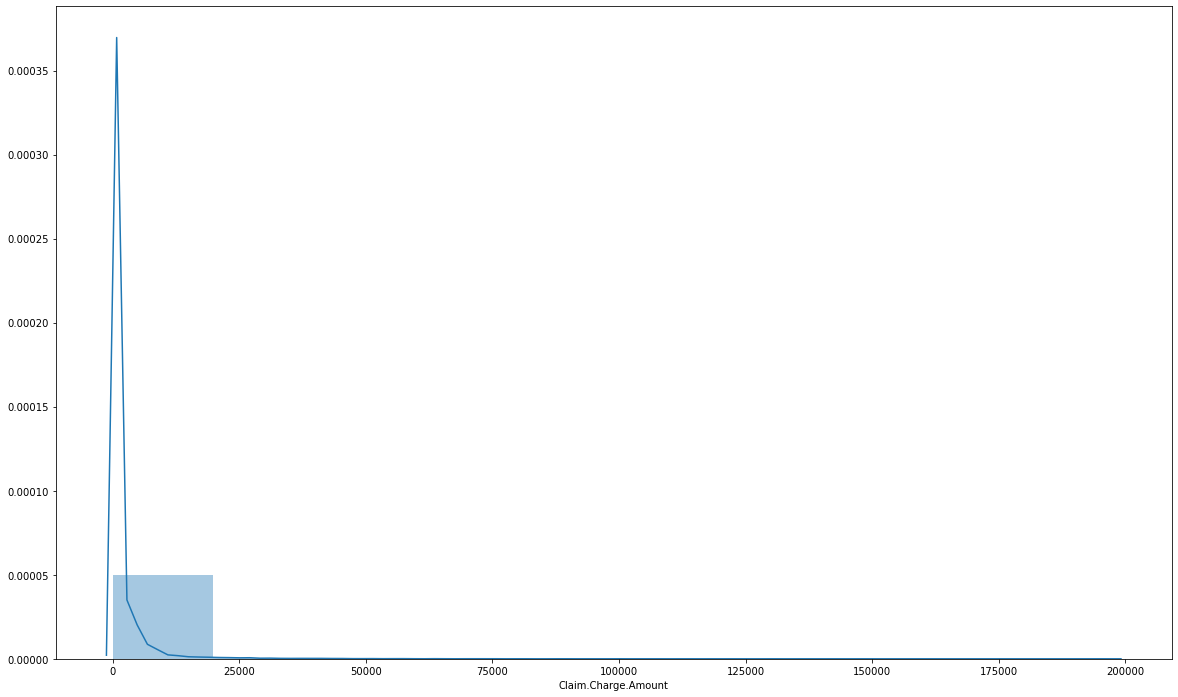

In [8]:
plt.figure(figsize=(20,12))
col = 'Claim.Charge.Amount'
claim_zero_200 = claim_data.loc[(claim_data[col] >= 0) &  (claim_data[col] <= 200000), col]
sns.distplot(claim_zero_200, bins=10);

In [9]:
# get procedure claims and add them to a list
IsProcedure = [ 1 if proc.startswith('J') else 0 for proc in claim_data['Procedure.Code']]

# add list as a new column to the dataframe
claim_data['IsProcedure'] = IsProcedure

# show a sample of the data
claim_data.loc[claim_data.IsProcedure == 1].head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,IsProcedure
3073,74645490.0,10.0,1992052.0,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114.0,1613650.0,0.0,M,H,S,91.0,P00000000001,FH001309QB01,1
3091,18860690.0,8.0,22808129.0,FA0001389001,1,636,OP7O,,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,0.0,275.0,18475600.0,483.0,M,H,,2.0,H00000000001,FH001886QH01,1
3092,18860690.0,9.0,22808129.0,FA0001389001,1,636,OP7O,,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,0.0,275.0,18475600.0,483.0,M,H,,2.0,H00000000001,FH001886QH01,1
3103,281757390.0,10.0,1997607.0,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KDR,A,I,N,N,,0.0,0.0,114.0,1618150.0,0.0,M,H,S,91.0,P00000000001,FH001309QB01,1
3114,450273590.0,10.0,1991496.0,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114.0,1613200.0,0.0,M,H,S,2.0,P00000000001,FH001309QB01,1


# Question 1 (Procedure Analysis)

## Part A (Find the number of claim lines that have J-codes)

In [10]:
claims_with_procedures = claim_data.loc[claim_data.IsProcedure == 1, 'Claim.Number']
f"The number of unique claims with procedures is {len(np.unique(claims_with_procedures))}"

'The number of unique claims with procedures is 10691'

## Part B (How much was paid to providers for In Network Claims?)

In [11]:
from babel.numbers import format_currency
in_network_claims_with_procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
                                                    & (claim_data['In.Out.Of.Network'] == 'I'), 'Provider.Payment.Amount']
paid_amount = round(np.sum(in_network_claims_with_procedures),2)
f"The sum of payments made to providers for in-network procedures is {format_currency(paid_amount, 'USD', locale='en_US')}"


'The sum of payments made to providers for in-network procedures is $2,417,220.96'

## Part C (What are the top five J-codes based on the payment to providers?)


In [12]:
claim_data.loc[claim_data.IsProcedure == 1, 'Procedure.Code'].value_counts(ascending=False).head()

J2250    4930
J7120    4489
J3010    4323
J2405    3892
J3490    3289
Name: Procedure.Code, dtype: int64

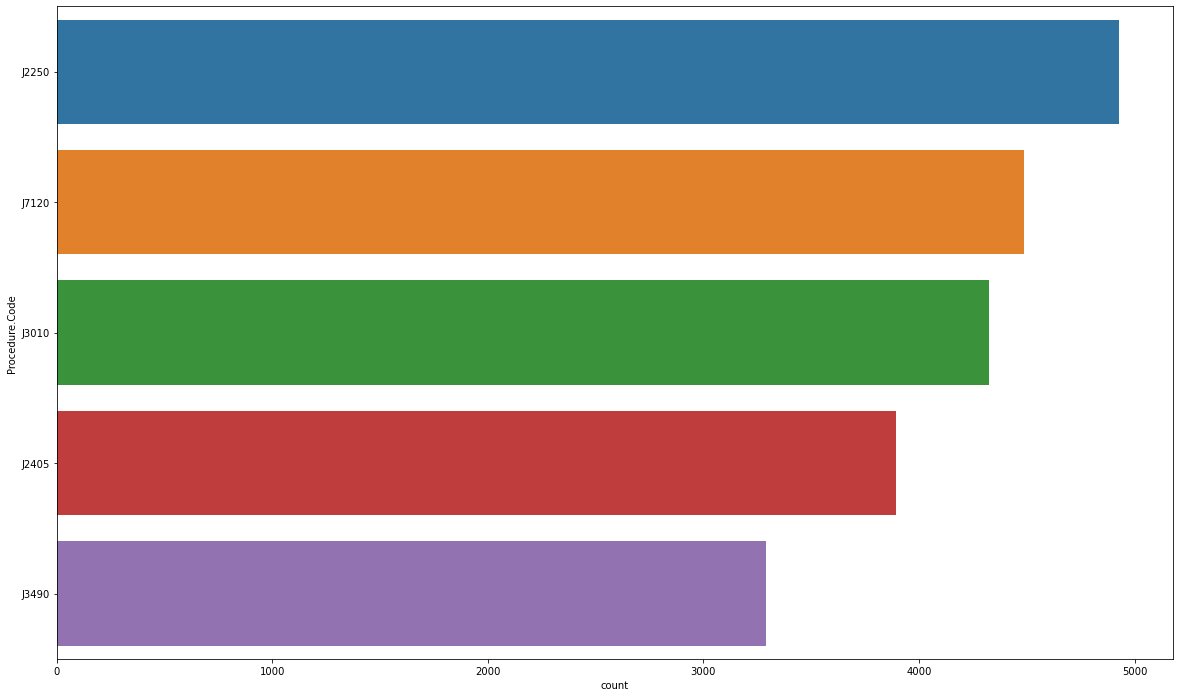

In [13]:
plt.figure(figsize=(20,12))
procedures = claim_data.loc[claim_data.IsProcedure == 1, 'Procedure.Code']
sns.countplot(y=procedures, order=procedures.value_counts().iloc[:5].index)

# Question 2 (Provider Analysis)

## Scatter plot analysis of paid versus unpaid claims

In [14]:
# get providers with at least one paid claim
providers_with_paid_claims = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Provider.ID']
providers = list(set(providers_with_paid_claims))
provider_claims = [1 if prov in providers else 0 for prov in claim_data['Provider.ID']]



In [15]:
# get upaid claim data and put it into the claim dataframe
unpaid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] == 0), 'Claim.Number'].index
unpaid_claims = np.zeros(len(claim_data))
unpaid_claims[unpaid_claim_data] = 1
claim_data['UnpaidClaim'] = unpaid_claims
claim_data['UnpaidClaim']  = claim_data['UnpaidClaim'].astype(int)

In [16]:
# get paid procedure claim data and put it into the claim dataframe
paid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Claim.Number'].index
paid_claims = np.zeros(len(claim_data))
paid_claims[paid_claim_data] = 1
claim_data['PaidClaim'] = paid_claims
claim_data['PaidClaim']  = claim_data['PaidClaim'].astype(int)

In [17]:
# produce unpaid and paid claim count by provider and load into a dataframe
provider_data = [GetProviderCount(claim_data, provider) for provider in providers]
provider_df = pd.DataFrame(provider_data, columns=['ProviderID','PaidCount','UnPaidCount'])

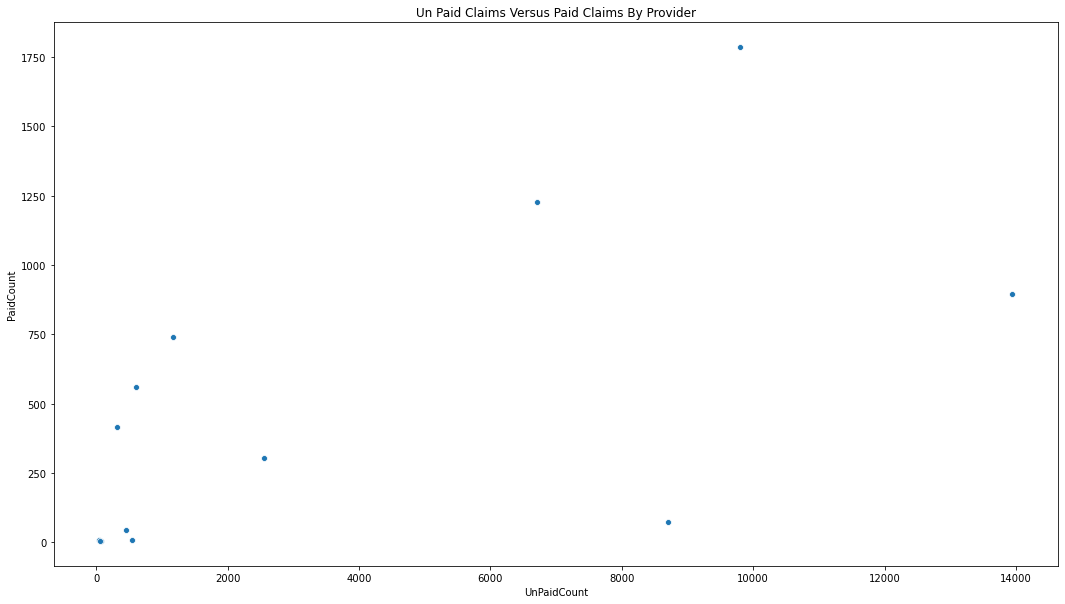

In [18]:
plt.figure(figsize=(18,10))
plt.title("Un Paid Claims Versus Paid Claims By Provider")
ax = sns.scatterplot(x='UnPaidCount', y="PaidCount", data=provider_df)

## Graph Analysis and Concerns

As the numbers have stated, the provider paid percentage average is 17.69 while the average unpaid percentage is 82.31 which means that on overage healthcare organization are missing 82.31 of potential revenue. Providers have a paid percentage of anywhere between 1 to 56 percent. I would want to understand how this data relates to time as most claims are not paid until the end of the month. I would also want to understand why there is a wide discrepancy between provider paid percentages.  There is a strong positive correlation between the two variables (Paid Versus Unpaid Counts).


# Question 3 (Analysis and Modeling)

In [19]:
provider_df['Total Claims'] = provider_df['PaidCount'] + provider_df['UnPaidCount']
provider_df['Paid Percentage'] = (provider_df['PaidCount'] / provider_df['Total Claims']) * 100
provider_df['UnPaid Percentage'] = 100 - provider_df['Paid Percentage']
provider_df

,ProviderID,PaidCount,UnPaidCount,Total Claims,Paid Percentage,UnPaid Percentage
0,FA0001774001,302,2545,2847,10.607657,89.392343
1,FA0001389003,8,539,547,1.462523,98.537477
2,FA0001411003,4,67,71,5.633803,94.366197
3,FA1000015002,43,449,492,8.739837,91.260163
4,FA0004551001,415,322,737,56.309362,43.690638
5,FA0001389001,895,13947,14842,6.030185,93.969815
6,FA1000016001,7,46,53,13.207547,86.792453
7,FA0001387001,74,8710,8784,0.842441,99.157559
8,FA1000014001,561,601,1162,48.278830,51.721170
9,FA0001411001,1228,6703,7931,15.483546,84.516454


In [20]:
average_paid_percentage = np.average(provider_df['Paid Percentage'])
average_unpaid_percentage = np.average(provider_df['UnPaid Percentage'])
f"The average paid percentage is {average_paid_percentage} while the unpaid percentage is {average_unpaid_percentage}"

'The average paid percentage is 17.693456299234207 while the unpaid percentage is 82.3065437007658'

## Data Prep

In [71]:
# load procedure data including new columns 
procedure_data = claim_data.loc[claim_data.IsProcedure == 1].copy()

# delete claim data from memory
del claim_data

# drop unneccessary columns (IsProcedure and Paid Claim)
procedure_data.drop(['IsProcedure', 'PaidClaim'], axis=1, inplace=True)

# convert claim number to an integer value
procedure_data['Claim.Number'] = procedure_data['Claim.Number'].astype(int)

# save data to file for future usage
procedure_data.to_csv(os.path.join('../data','cleaned', 'procedure_data.tar.gz'), compression='gzip', index=False)

In [72]:
# load data
procedure_data = pd.read_csv(os.path.join('../data','cleaned', 'procedure_data.tar.gz'), low_memory=False)

# show first few rows
procedure_data.head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
0,74645490,10.0,1992052.0,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114.0,1613650.0,0.0,M,H,S,91.0,P00000000001,FH001309QB01,1
1,18860690,8.0,22808129.0,FA0001389001,1,636,OP7O,,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,0.0,275.0,18475600.0,483.0,M,H,,2.0,H00000000001,FH001886QH01,1
2,18860690,9.0,22808129.0,FA0001389001,1,636,OP7O,,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,0.0,275.0,18475600.0,483.0,M,H,,2.0,H00000000001,FH001886QH01,1
3,281757390,10.0,1997607.0,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KDR,A,I,N,N,,0.0,0.0,114.0,1618150.0,0.0,M,H,S,91.0,P00000000001,FH001309QB01,1
4,450273590,10.0,1991496.0,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114.0,1613200.0,0.0,M,H,S,2.0,P00000000001,FH001309QB01,1


In [73]:
# look at values counts for the target
procedure_data['UnpaidClaim'].value_counts()

1    44961
0     6068
Name: UnpaidClaim, dtype: int64

In [74]:
# look at line of business for procedure claims
procedure_data['Line.Of.Business.ID'].value_counts()

      18962
1     16858
5     10946
13     2346
2      1906
7        11
Name: Line.Of.Business.ID, dtype: int64

In [75]:
# look at line of business for procedure claims
procedure_data['Revenue.Code'].value_counts()

636    45594
637     1869
710     1808
250     1573
258       98
259       78
490        3
           2
450        2
635        1
272        1
Name: Revenue.Code, dtype: int64

In [76]:
# look at line of business for procedure claims
procedure_data['Service.Code'].value_counts(ascending=False).head(10)

OP7O    33185
SU7A    17288
MH7O      250
AL7I      121
GB7A       69
           59
SA7A       39
CC8A       11
ER7O        2
SU7O        2
Name: Service.Code, dtype: int64

In [77]:
# look at line of business for procedure claims
procedure_data['Place.Of.Service.Code'].value_counts()

      51027
11        2
Name: Place.Of.Service.Code, dtype: int64

In [78]:
# look at line of business for procedure claims
procedure_data['Diagnosis.Code'].value_counts(ascending=False).head(10)

# 585.6 == End Stage Renal Disease
# v765.1 == Special screening for malignant neoplasms of colon
# 366.16 == Senile nuclear sclerosis (cataracts)

5856     4245
V7651    2540
36616    1451
3669     1403
41401    1013
42731     778
57410     741
5409      733
55090     648
5921      539
Name: Diagnosis.Code, dtype: int64

In [79]:
# look at charge amounts
procedure_data['Claim.Charge.Amount'].value_counts(ascending=False).head(10)

84.563250     5426
169.126500     722
353.067000     671
52.219350      664
43.948200      662
87.032250      652
246.900000     577
103.698000     548
264.664455     517
338.253000     508
Name: Claim.Charge.Amount, dtype: int64

In [80]:
# look at denial reason code
procedure_data['Denial.Reason.Code'].value_counts(ascending=False).head(10)

       40417
PDC     2824
K62     2691
J2M      803
J72      705
JSO      486
J2L      402
KKE      249
JQ3      232
511      184
Name: Denial.Reason.Code, dtype: int64

In [81]:
# look at priced index
procedure_data['Price.Index'].value_counts(ascending=False).head(10)

A    29547
     21170
E      312
Name: Price.Index, dtype: int64

In [82]:
# look at priced index
procedure_data['In.Out.Of.Network'].value_counts(ascending=False).head(10)

I    31890
     18980
O      159
Name: In.Out.Of.Network, dtype: int64

In [83]:
# look at reference index
procedure_data['Reference.Index'].value_counts(ascending=False).head(10)

     18666
N    16473
V    15879
F       11
Name: Reference.Index, dtype: int64

In [84]:
# look at pricing index
procedure_data['Pricing.Index'].value_counts(ascending=False).head(10)

N    28056
     18666
V     4194
F      113
Name: Pricing.Index, dtype: int64

In [86]:
# look at capitation index
procedure_data['Capitation.Index'].value_counts(ascending=False).head(10)

     32331
N    18296
R      402
Name: Capitation.Index, dtype: int64

In [87]:
# look at subscriber payment amount
procedure_data['Subscriber.Payment.Amount'].value_counts(ascending=False).head(10)

0.0000      51028
174.1139        1
Name: Subscriber.Payment.Amount, dtype: int64

In [89]:
# look at provider payment amount
procedure_data['Provider.Payment.Amount'].value_counts(ascending=False).head(10)

0.000000      44961
61.650930       113
353.067000      100
59.280690        96
0.012345         86
84.563250        79
280.848750       72
233.394570       60
269.071620       59
135.177750       57
Name: Provider.Payment.Amount, dtype: int64

In [93]:
# look at group index
procedure_data[procedure_data.columns[19]].value_counts(ascending=False).head(10)

48546.0    16297
114.0      11033
572.0       9905
110.0       5474
48549.0     1599
47656.0      160
12976.0      118
22368.0       98
25509.0       87
18106.0       86
Name: Group.Index, dtype: int64

In [94]:
# look at subscriber index
procedure_data[procedure_data.columns[20]].value_counts(ascending=False).head(10)

71700800.0    306
69448150.0    305
72422650.0    247
76652600.0    176
73037200.0    173
17723800.0    159
67552000.0    155
69861400.0    154
1609700.0     142
1610950.0     141
Name: Subscriber.Index, dtype: int64

In [96]:
# look at sub-group index
procedure_data[procedure_data.columns[21]].value_counts(ascending=False).head(10)

0.0        42797
52255.0      800
52245.0      619
52254.0      153
13610.0      118
23592.0       98
26881.0       87
19011.0       86
30537.0       85
6760.0        78
Name: Subgroup.Index, dtype: int64

In [97]:
# look at claim type
procedure_data[procedure_data.columns[22]].value_counts(ascending=False).head(10)

M    48612
E     2417
Name: Claim.Type, dtype: int64

In [99]:
# look at subsriber type
procedure_data[procedure_data.columns[23]].value_counts(ascending=False).head(10)

H    51027
M        2
Name: Claim.Subscriber.Type, dtype: int64

In [100]:
# look at claim pre price index
procedure_data[procedure_data.columns[24]].value_counts(ascending=False).head(10)

     39996
S    10959
E       74
Name: Claim.Pre.Prince.Index, dtype: int64

In [101]:
# look at claim current status
procedure_data[procedure_data.columns[25]].value_counts(ascending=False).head(10)

2.0     41391
81.0     3001
91.0     2032
11.0     1498
19.0      955
99.0      915
1.0       657
15.0      520
89.0       60
Name: Claim.Current.Status, dtype: int64

In [104]:
# network id
procedure_data[procedure_data.columns[26]].value_counts(ascending=False).head(10)

                19063
P00000000007    14270
P00000000001    12405
P00000000002     1883
MIMAPD000002     1273
MIMAPD000001      879
H00000000001      669
MGMAPD000001      257
ITS000000004      101
H00000000003       88
Name: Network.ID, dtype: int64

In [106]:
# agreement id
procedure_data[procedure_data.columns[27]].value_counts(ascending=False).head(10)

                18905
FH001311QB01     5586
FH002449QPD1     5155
FH002454QPD1     4571
FH001309QB01     4409
FH001310QB01     3777
FH002451QPD1     3048
A00BLCH0Q001     1374
FH000595QB01     1302
FH002441QPD1      681
Name: Agreement.ID, dtype: int64

51029 procedures
10691 unique procedure claims
6341 unique patients
Top Procedures for Member (88514637.0, 306)
mostly end stage renal cancer patients
top 5 injections are for prepping the patient for infusion (anethesia)
healthcare claim code reference (https://www.uhccommunityplan.com/assets/healthcareprofessionals/providerinformation/AZ-Provider-Information/AZ_Health_Care_Status_Codes.pdf)


In [108]:
procedure_data.shape

(51029, 29)

In [110]:
procedure_data['Member.ID'].nunique()

6341

In [111]:
procedure_data['Member.ID'].value_counts(ascending=False).head()

88514637.0    306
85733741.0    305
89405761.0    247
94627634.0    176
90164423.0    173
Name: Member.ID, dtype: int64